Figure out what minimum budget you need to get a movie with the best chances of success
Group everything by year
add column with percentage of movie budget vs budget for movies that year
add column with percentage of movie grossing worldwide vs grossing worldwide for movies that year
add column that does a ratio for percent budget and percent grossing. budget % / grossing %. sort lowest to greatest to get movies that did the best with lower budgets.

Take buckets to see what percentage of movies did well with different buckets of budget amounts

In [2]:
#Imports
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt




In [22]:
#prepare and save cleaned data csv
%run clean_data.py

Read in Dataframe and analyze data types and info about structure

In [ ]:
#Read in the data
imdb_all_years_df = pd.read_csv("./Resources/cleaned_data.csv")
# imdb_all_years_df.info()
# imdb_all_years_df.head()

#drop rows where the country of origin list does not contain South Korea
imdb_south_japan_df = imdb_all_years_df.query("countries_origin.str.contains('Japan')", engine='python')

#drop rows where the country of origin list does not contain South Korea using loc function
imdb_south_korea_df = imdb_all_years_df.loc[imdb_all_years_df['countries_origin'].str.contains('Germany', na=False)]

# imdb_south_japan_df.dropna()

# imdb_south_korea_df

1,000.24


Clean Up Data

In [ ]:
#replace NaN with 0
# imdb_all_years_df = imdb_all_years_df.fillna(1)
# imdb_all_years_df = imdb_all_years_df.dropna(how="any")

#drop all rows that have nan for budget column
budget_df = imdb_all_years_df.dropna(subset=['budget'])

#drop rows that have south korea in the countries_origin
budget_df = budget_df[~budget_df['countries_origin'].str.contains('South Korea')]
budget_df = budget_df[~budget_df['countries_origin'].str.contains('Japan')]
budget_df = budget_df[~budget_df['countries_origin'].str.contains('West Germany')]
budget_df = budget_df[~budget_df['countries_origin'].str.contains('Poland')]

imdb_south_korea_df = imdb_all_years_df.loc[imdb_all_years_df['countries_origin'].str.contains('France', na=False)]
imdb_south_korea_df

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date
76,First Spaceship on Venus,First Spaceship on Venus,1960,1h 19m,Unrated,4.6,3.3K,NaN,NaN,NaN,...,"['Yôko Tani', 'Oldrich Lukes', 'Ignacy Machows...","['Space Sci-Fi', 'Sci-Fi']","['East Germany', 'Poland']","['WFF Film Studio, Wroclaw, Dolnoslaskie, Pola...","['DEFA-Studio für Spielfilme', ""Künstlerische ...",['German'],0,0,0,1960.0
220,Innocent Sorcerers,Innocent Sorcerers,1960,1h 23m,NaN,7.3,1.6K,NaN,NaN,NaN,...,"['Tadeusz Lomnicki', 'Krystyna Stypulkowska', ...","['Drama', 'Music', 'Romance']",['Poland'],"['Old Town Market Square, Old Town, Sródmiesci...","['Zespol Filmowy ""Kadr""']",['Polish'],0,0,0,1960.0
287,"Goodbye, See You Tomorrow","Goodbye, See You Tomorrow",1960,1h 28m,NaN,7.0,864,NaN,NaN,NaN,...,"['Zbigniew Cybulski', 'Teresa Tuszynska', 'Gra...","['Drama', 'Romance']",['Poland'],"['Gdansk, Pomorskie, Poland']","['Zespol Filmowy ""Kadr""']","['Polish', 'French', 'English']",0,0,0,1960.0
288,Knights of the Teutonic Order,Knights of the Teutonic Order,1960,2h 46m,NaN,6.9,2.3K,33000000.0,NaN,NaN,...,"['Urszula Modrzynska', 'Grazyna Staniszewska',...","['Adventure', 'Drama', 'History', 'Romance', '...",['Poland'],"['Las Lagiewnicki, Lódz, Lódzkie, Poland']","['Zespól Filmowy ""Studio""']",['Polish'],0,0,0,1960.0
295,Bad Luck,Bad Luck,1960,1h 32m,NaN,7.4,1.4K,NaN,1708.0,NaN,...,"['Bogumil Kobiela', 'Maria Ciesielska', 'Helen...",['Comedy'],['Poland'],"['Agrykola, Royal Lazienki Park, Sródmiescie, ...","['Zespol Filmowy ""Kamera""']",['Polish'],0,0,0,1960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33088,A Real Pain,A Real Pain,2024,1h 30m,R,7.3,11K,NaN,9256927.0,7772102.0,...,"['Kieran Culkin', 'Jesse Eisenberg', 'Olha Bos...","['Buddy Comedy', 'Comedy', 'Drama']","['Poland', 'United States']","['Majdanek, Lublin, Lubelskie, Poland']","['Topic Studios', 'Extreme Emotions', 'Fruit T...","['English', 'Polish']",0,77,0,2024.0
33190,Treasure,Treasure,2024,1h 51m,R,6.3,1.6K,NaN,1657730.0,541578.0,...,"['Lena Dunham', 'Stephen Fry', 'Zbigniew Zamac...","['Tragedy', 'Comedy', 'Drama']","['Germany', 'France', 'Poland', 'Belgium', 'Hu...","['Warsaw, Mazowieckie, Poland']","['Seven Elephants', 'Kings & Queens Filmproduk...","['English', 'Polish']",0,0,0,2024.0
33255,The Girl with the Needle,The Girl with the Needle,2024,2h 3m,NaN,7.5,967,NaN,54349.0,50438.0,...,"['Vic Carmen Sonne', 'Trine Dyrholm', 'Besir Z...",['Drama'],"['Denmark', 'Poland', 'Sweden']","['Copenhagen, Denmark']","['Nordisk Film Production', 'Creative Alliance...",['Danish'],0,16,0,2024.0
33531,Justice,Justice,2024,1h 53m,TV-MA,6.3,3.3K,NaN,NaN,NaN,...,"['Olaf Lubaszenko', 'Jedrzej Hycnar', 'Wiktori...","['Heist', 'Crime', 'Drama']",['Poland'],[],['MAG Entertainment'],['Polish'],0,0,0,2024.0


In [5]:
imdb_all_years_df.dtypes

Title                     object
Movie Link                object
Year                       int64
Duration                  object
MPA                       object
Rating                   float64
Votes                     object
budget                   float64
grossWorldWide           float64
gross_US_Canada          float64
opening_weekend_Gross    float64
directors                 object
writers                   object
stars                     object
genres                    object
countries_origin          object
filming_locations         object
production_companies      object
Languages                 object
wins                       int64
nominations                int64
oscars                     int64
release_date             float64
dtype: object

In [6]:
#sort values by year
imbd_all_years_df = imdb_all_years_df.sort_values(by='Year')

#group by year, title and grossWorldWide and display dataframe
group_by_year_imbd_all_years_df = imdb_all_years_df.groupby(['Year', 'Title'])['grossWorldWide'].mean()

Group and graph data showing worldwide gross of movies over time

<BarContainer object of 33600 artists>

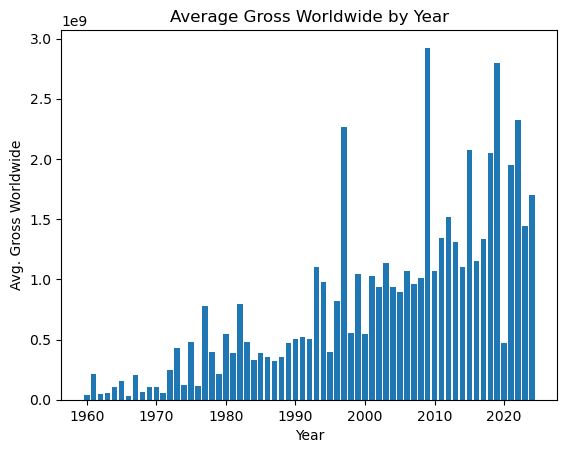

In [7]:
#Plot a bar graph with the year on the x-axis and the gross worldwide on the y-axis
plt.title("Average Gross Worldwide by Year") 
plt.xlabel('Year')
plt.ylabel('Avg. Gross Worldwide')

plt.locator_params(axis='y', nbins=10)
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['grossWorldWide'])

<BarContainer object of 33600 artists>

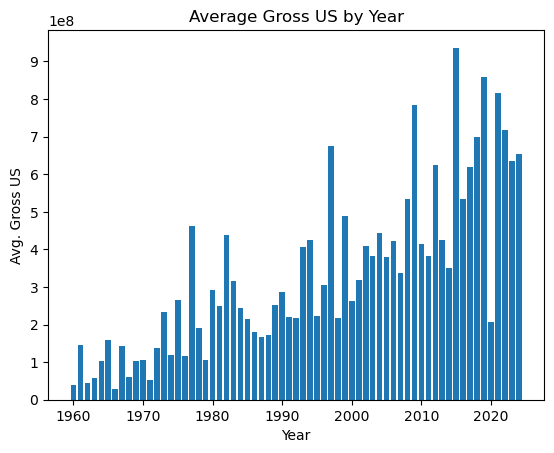

In [8]:
#Plot a bar graph with the year on the x-axis and the gross US on the y-axis
plt.title("Average Gross US by Year") 
plt.xlabel('Year')
plt.ylabel('Avg. Gross US')

plt.locator_params(axis='y', nbins=10)
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['gross_US_Canada'])

In [5]:
#Add new column for profit
imdb_all_years_df['Profit'] =  imdb_all_years_df['grossWorldWide'] - imdb_all_years_df['budget']
#Add new column for profit margin
imdb_all_years_df['Profit Margin'] = imdb_all_years_df['Profit'] / imdb_all_years_df['budget']
#add new column for ratio of budget to grossWorldWide
imdb_all_years_df['Budget to Gross Ratio'] = imdb_all_years_df['budget'] / imdb_all_years_df['grossWorldWide']

imdb_all_years_df['Profit'].describe()

count    9.406000e+03
mean    -3.386014e+07
std      3.214523e+09
min     -2.999844e+11
25%     -4.735026e+06
50%      3.834980e+05
75%      3.102142e+07
max      2.686706e+09
Name: Profit, dtype: float64

<BarContainer object of 33600 artists>

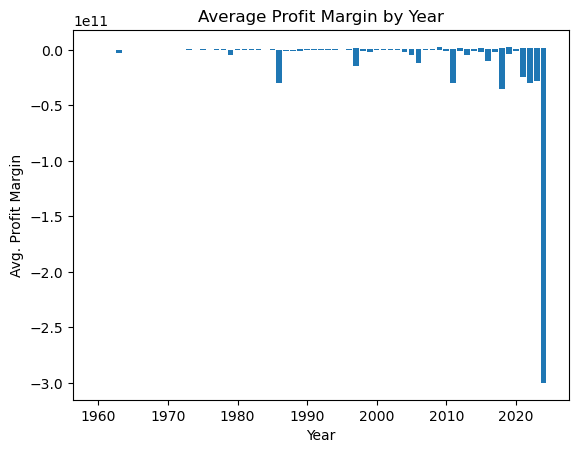

In [6]:
#Plot a bar graph with the year on the x-axis and the profit marign on the y-axis
plt.title("Average Profit Margin by Year")
plt.xlabel('Year')
plt.ylabel('Avg. Profit Margin')
#raise bar chart x axis up to show negative values
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['Profit'], align='center')

<BarContainer object of 33600 artists>

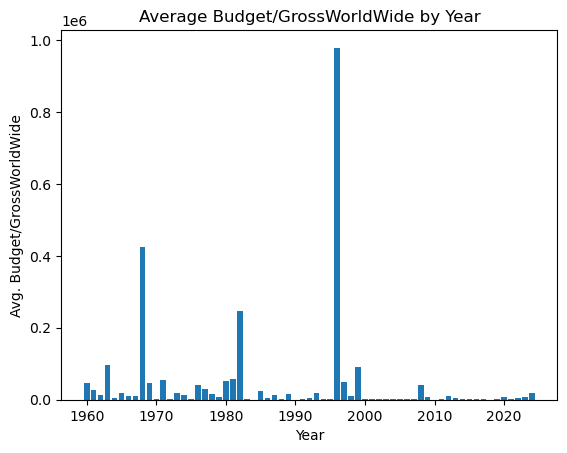

In [12]:
#Plot a bar graph with the year on the x-axis and the budget to grossworldwide on the y-axis
plt.title("Average Budget/GrossWorldWide by Year")
plt.xlabel('Year')
plt.ylabel('Avg. Budget/GrossWorldWide')
plt.bar(imdb_all_years_df['Year'], imdb_all_years_df['Budget to Gross Ratio'])

In [ ]:
#Its Clear from the above graph that movies on average dont make much money until recently.
imdb_all_years_df.sort_values(by='Budget to Gross Ratio', ascending=True)

,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,...,filming_locations,production_companies,Languages,wins,nominations,oscars,release_date,Profit,Profit Margin,Budget to Gross Ratio
32388,The Key Game,The Key Game,2022,1h 47m,NaN,4.9,1.2K,4.0,1157364.0,NaN,...,[],"['Atresmedia Cine', 'Atresmedia', 'Benidorm Fi...",['Spanish'],0,0,0,2022.0,1157360.0,289340.000000,0.000003
28989,League of Gods,League of Gods,2016,1h 49m,PG-13,4.5,3K,300.0,43498766.0,181633.0,...,[],"['Bona Film Group', 'China Star Movie', 'Aliba...",['Mandarin'],0,0,0,2016.0,43498466.0,144994.886667,0.000007
30822,Sarileru Neekevvaru,Sarileru Neekevvaru,2020,2h 49m,NaN,5.8,9.3K,260.0,37389889.0,821000.0,...,[],"['AK Entertainments', 'G. Mahesh Babu Entertai...",['Telugu'],0,17,0,2020.0,37389629.0,143806.265385,0.000007
32809,Radical Wolfe,Radical Wolfe,2023,1h 16m,NaN,7.2,320,1.0,39623.0,39623.0,...,[],[],['English'],0,0,0,2023.0,39622.0,39622.000000,0.000025
31552,Tadap,Tadap,2021,2h 6m,NaN,5.1,4.9K,20.0,302391.0,130934.0,...,[],"['Fox STAR Studios', 'Nadiadwala Grandson Ente...",['Hindi'],0,5,0,2021.0,302371.0,15118.550000,0.000066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,Vettaiyan,Vettaiyan,2024,2h 43m,NaN,7.1,38K,NaN,2397623.0,NaN,...,[],['Lyca Productions'],['Tamil'],0,0,0,2024.0,NaN,NaN,NaN
33596,Nr 24,Nr 24,2024,1h 51m,NaN,7.7,3.4K,NaN,3301976.0,NaN,...,"['Rjukan, Tinn, Norway']","['SF Norge A/S', 'Motion Blur Films']",['Norwegian'],0,0,0,2024.0,NaN,NaN,NaN
33597,Parallel,Parallel,2024,1h 28m,NaN,5.3,1.7K,NaN,NaN,NaN,...,[],"['Rumble Riot Pictures', 'Hodge Brothers Produ...",[],0,0,0,2024.0,NaN,NaN,NaN
33598,Fight or Flight,Fight or Flight,2024,2h 46m,NaN,7.0,117,NaN,NaN,NaN,...,['Hungary'],"['Asbury Park Productions', 'The Royal Budapes...",['English'],0,0,0,2024.0,NaN,NaN,NaN
